<a href="https://colab.research.google.com/github/boxain/house_prices/blob/master/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **從GitHub抓下資料集**

In [1]:
! git clone https://github.com/boxain/house_prices.git

Cloning into 'house_prices'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 1), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (5/5), done.


## **Index**

* Importing necessary libraries
* Importing the data
* Raw Data Visualization
 
  * Scatterplot of raw data
  * Null values heat-map
  * Comparison of Null values between training and testing data

* Data Pre-processing
* Splitting data into x(Values) and y(labels)
* Creating Model
  * Gradient Boosting Regression
  * Random Forest
* Submmission


### **Importing necessary libraries**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

### **Importing the Data**

In [3]:
dataTrain = pd.read_csv('./house_prices/train.csv')
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataTest = pd.read_csv('./house_prices/train.csv')
dataTest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### **Data Visualization**

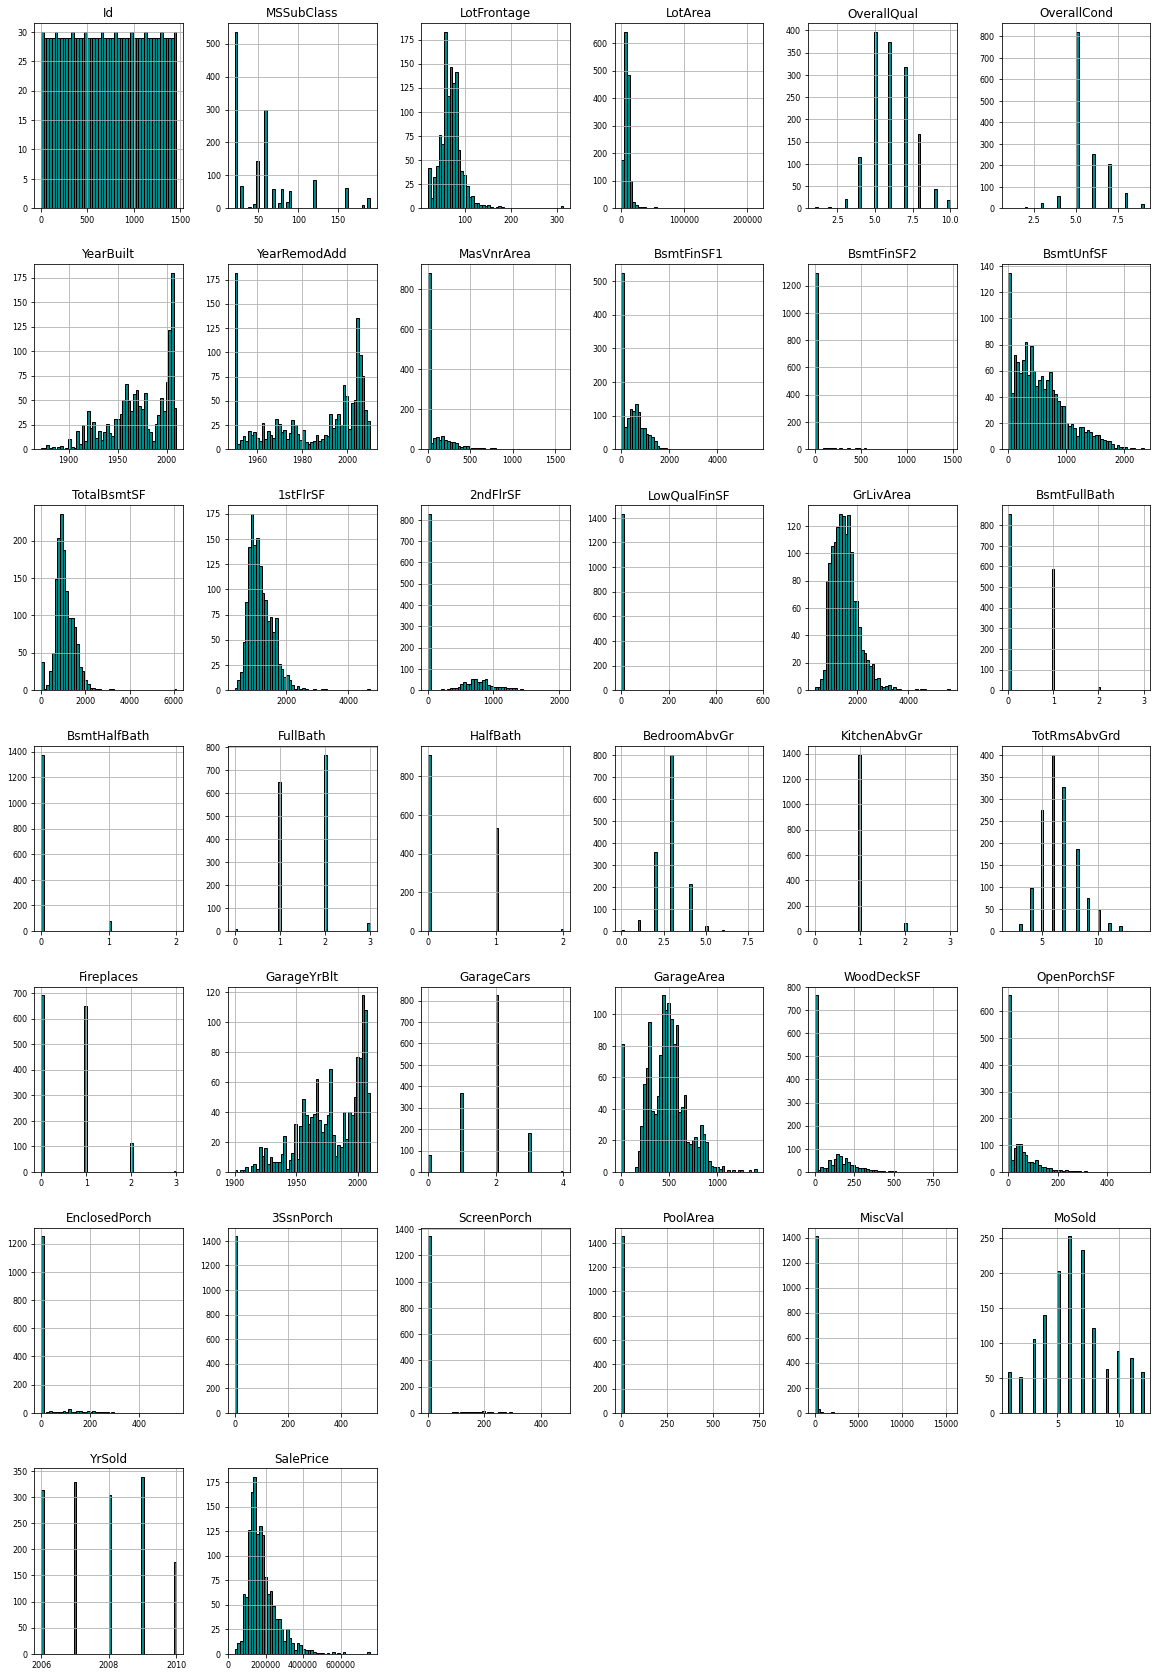

In [5]:
dataTrain.hist(figsize=(20,30),bins=50,color='darkcyan',edgecolor='black',xlabelsize=8,ylabelsize=8,grid=True)
plt.show()

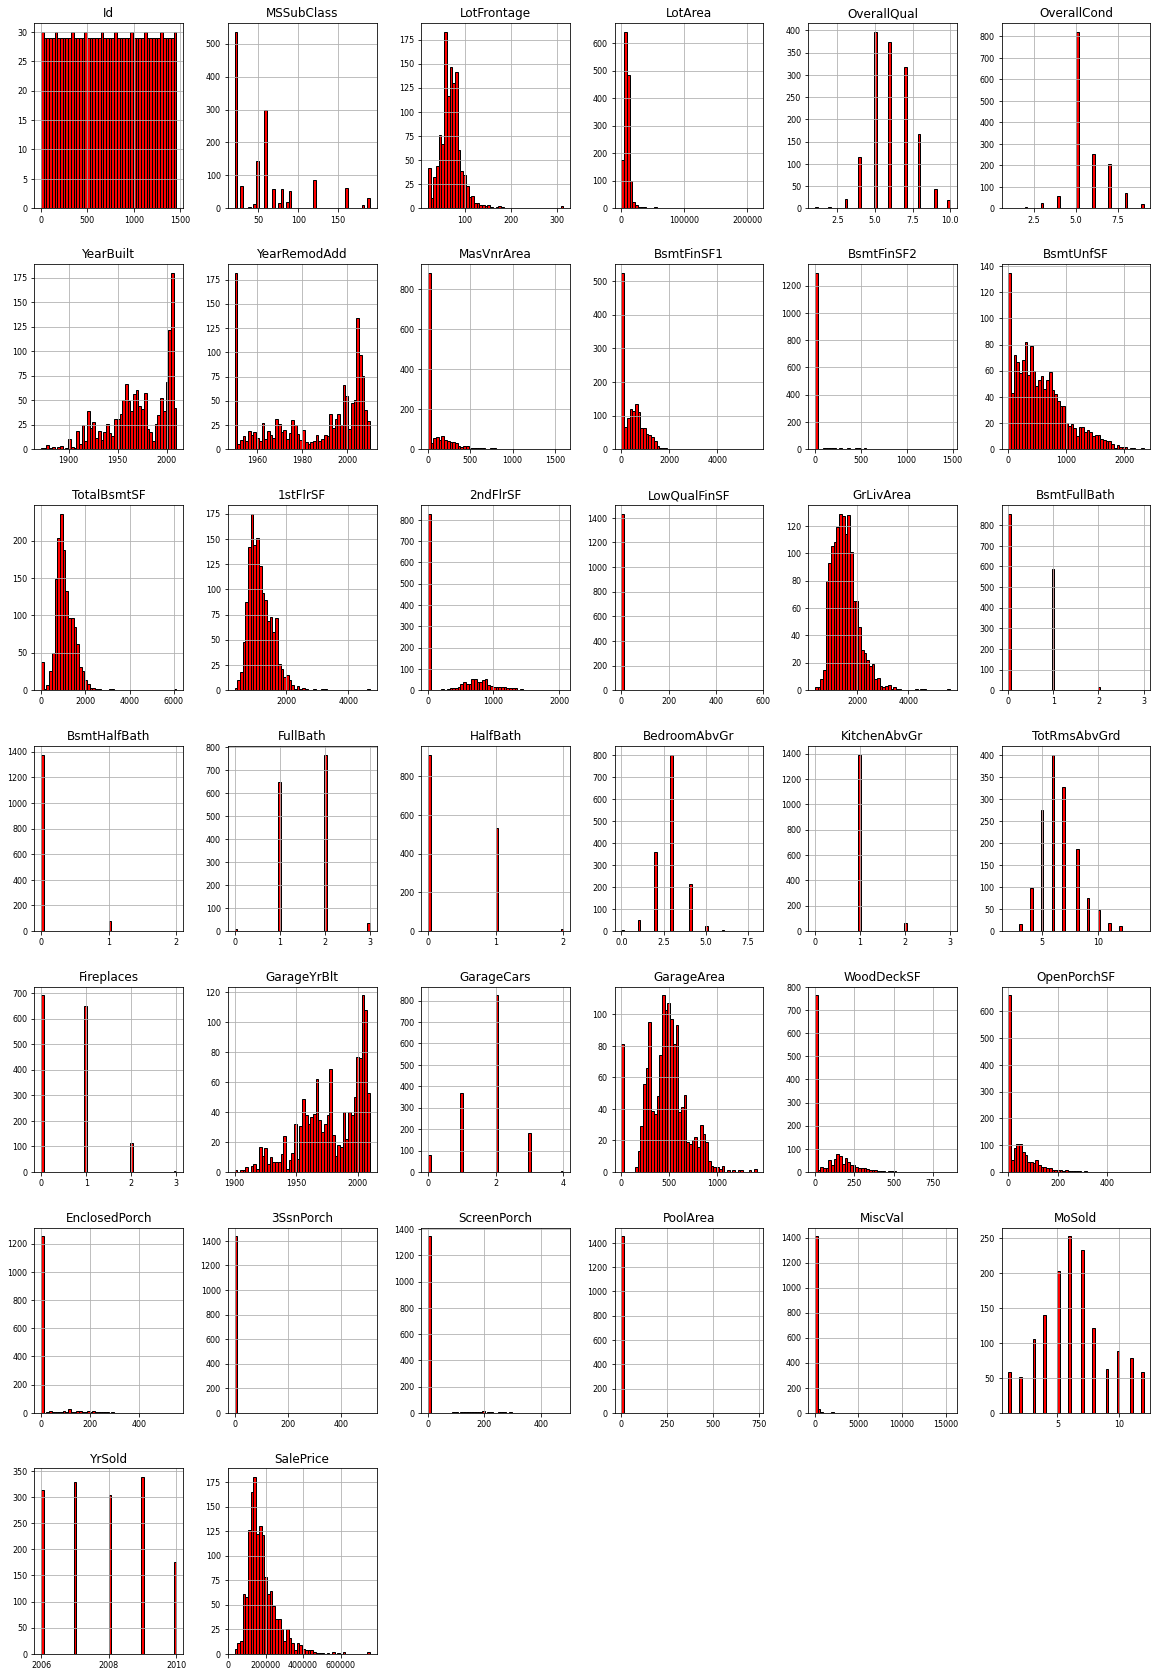

In [6]:
dataTrain.hist(figsize=(20,30),bins=50,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8,grid=True)
plt.show()

### **Scatterplot of raw data**

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

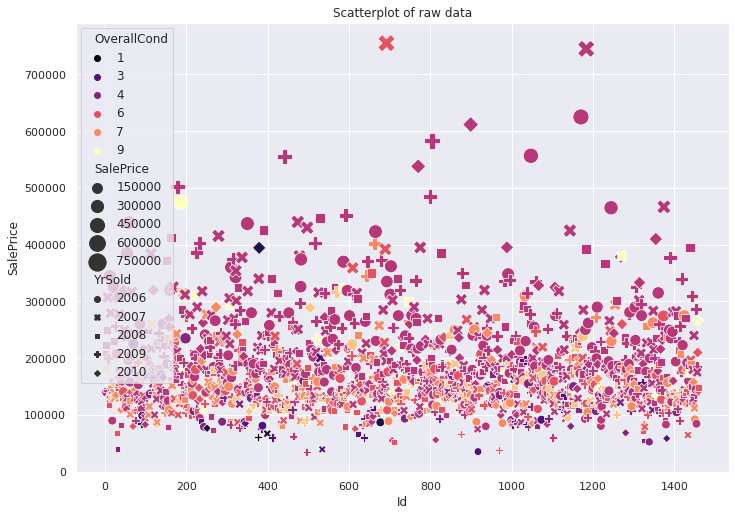

In [8]:
sns.scatterplot(data=dataTrain,x='Id',y='SalePrice',size='SalePrice',hue='OverallCond',style='YrSold',sizes=(60,300),palette='magma')
plt.title('Scatterplot of raw data')
plt.show()

### **Null values heat-map**

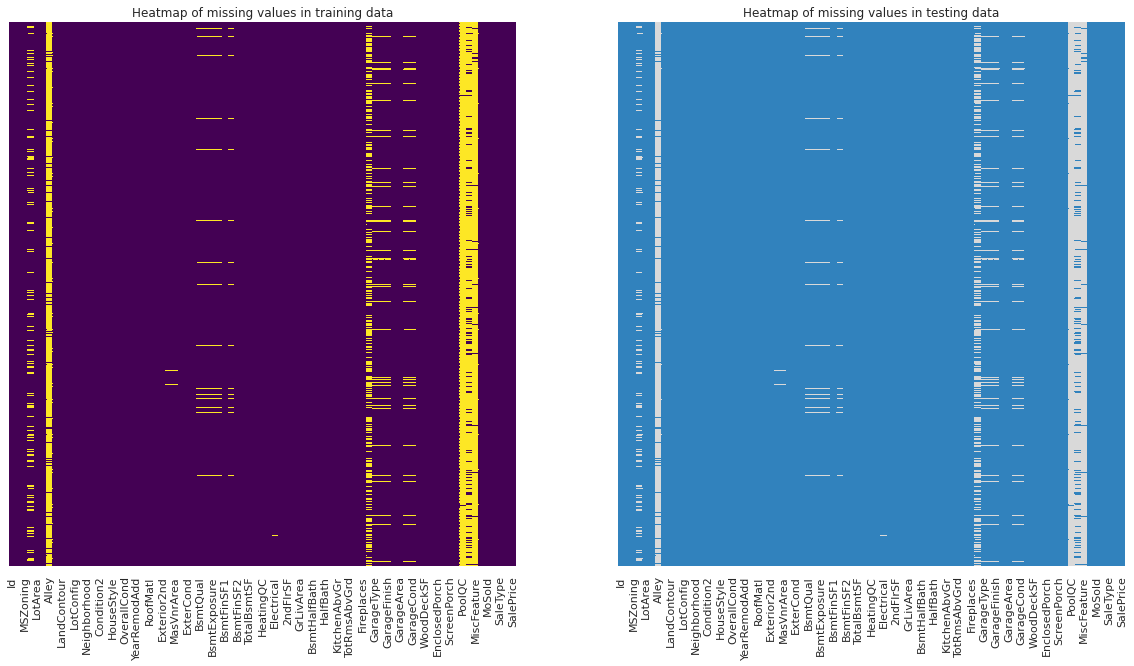

In [13]:
fig , axes = plt.subplots(1,2,sharex=True,figsize=(20,10))

sns.heatmap(data=dataTrain.isnull() , cbar=False , cmap='viridis',yticklabels=False,ax=axes[0]) #cbar=色塊條,yticklabels=可以以字符串进行命名，也可以调节编号的间隔，也可以不显示坐标
sns.heatmap(data=dataTest.isnull() , cbar=False , cmap='tab20c',yticklabels=False,ax=axes[1])
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()

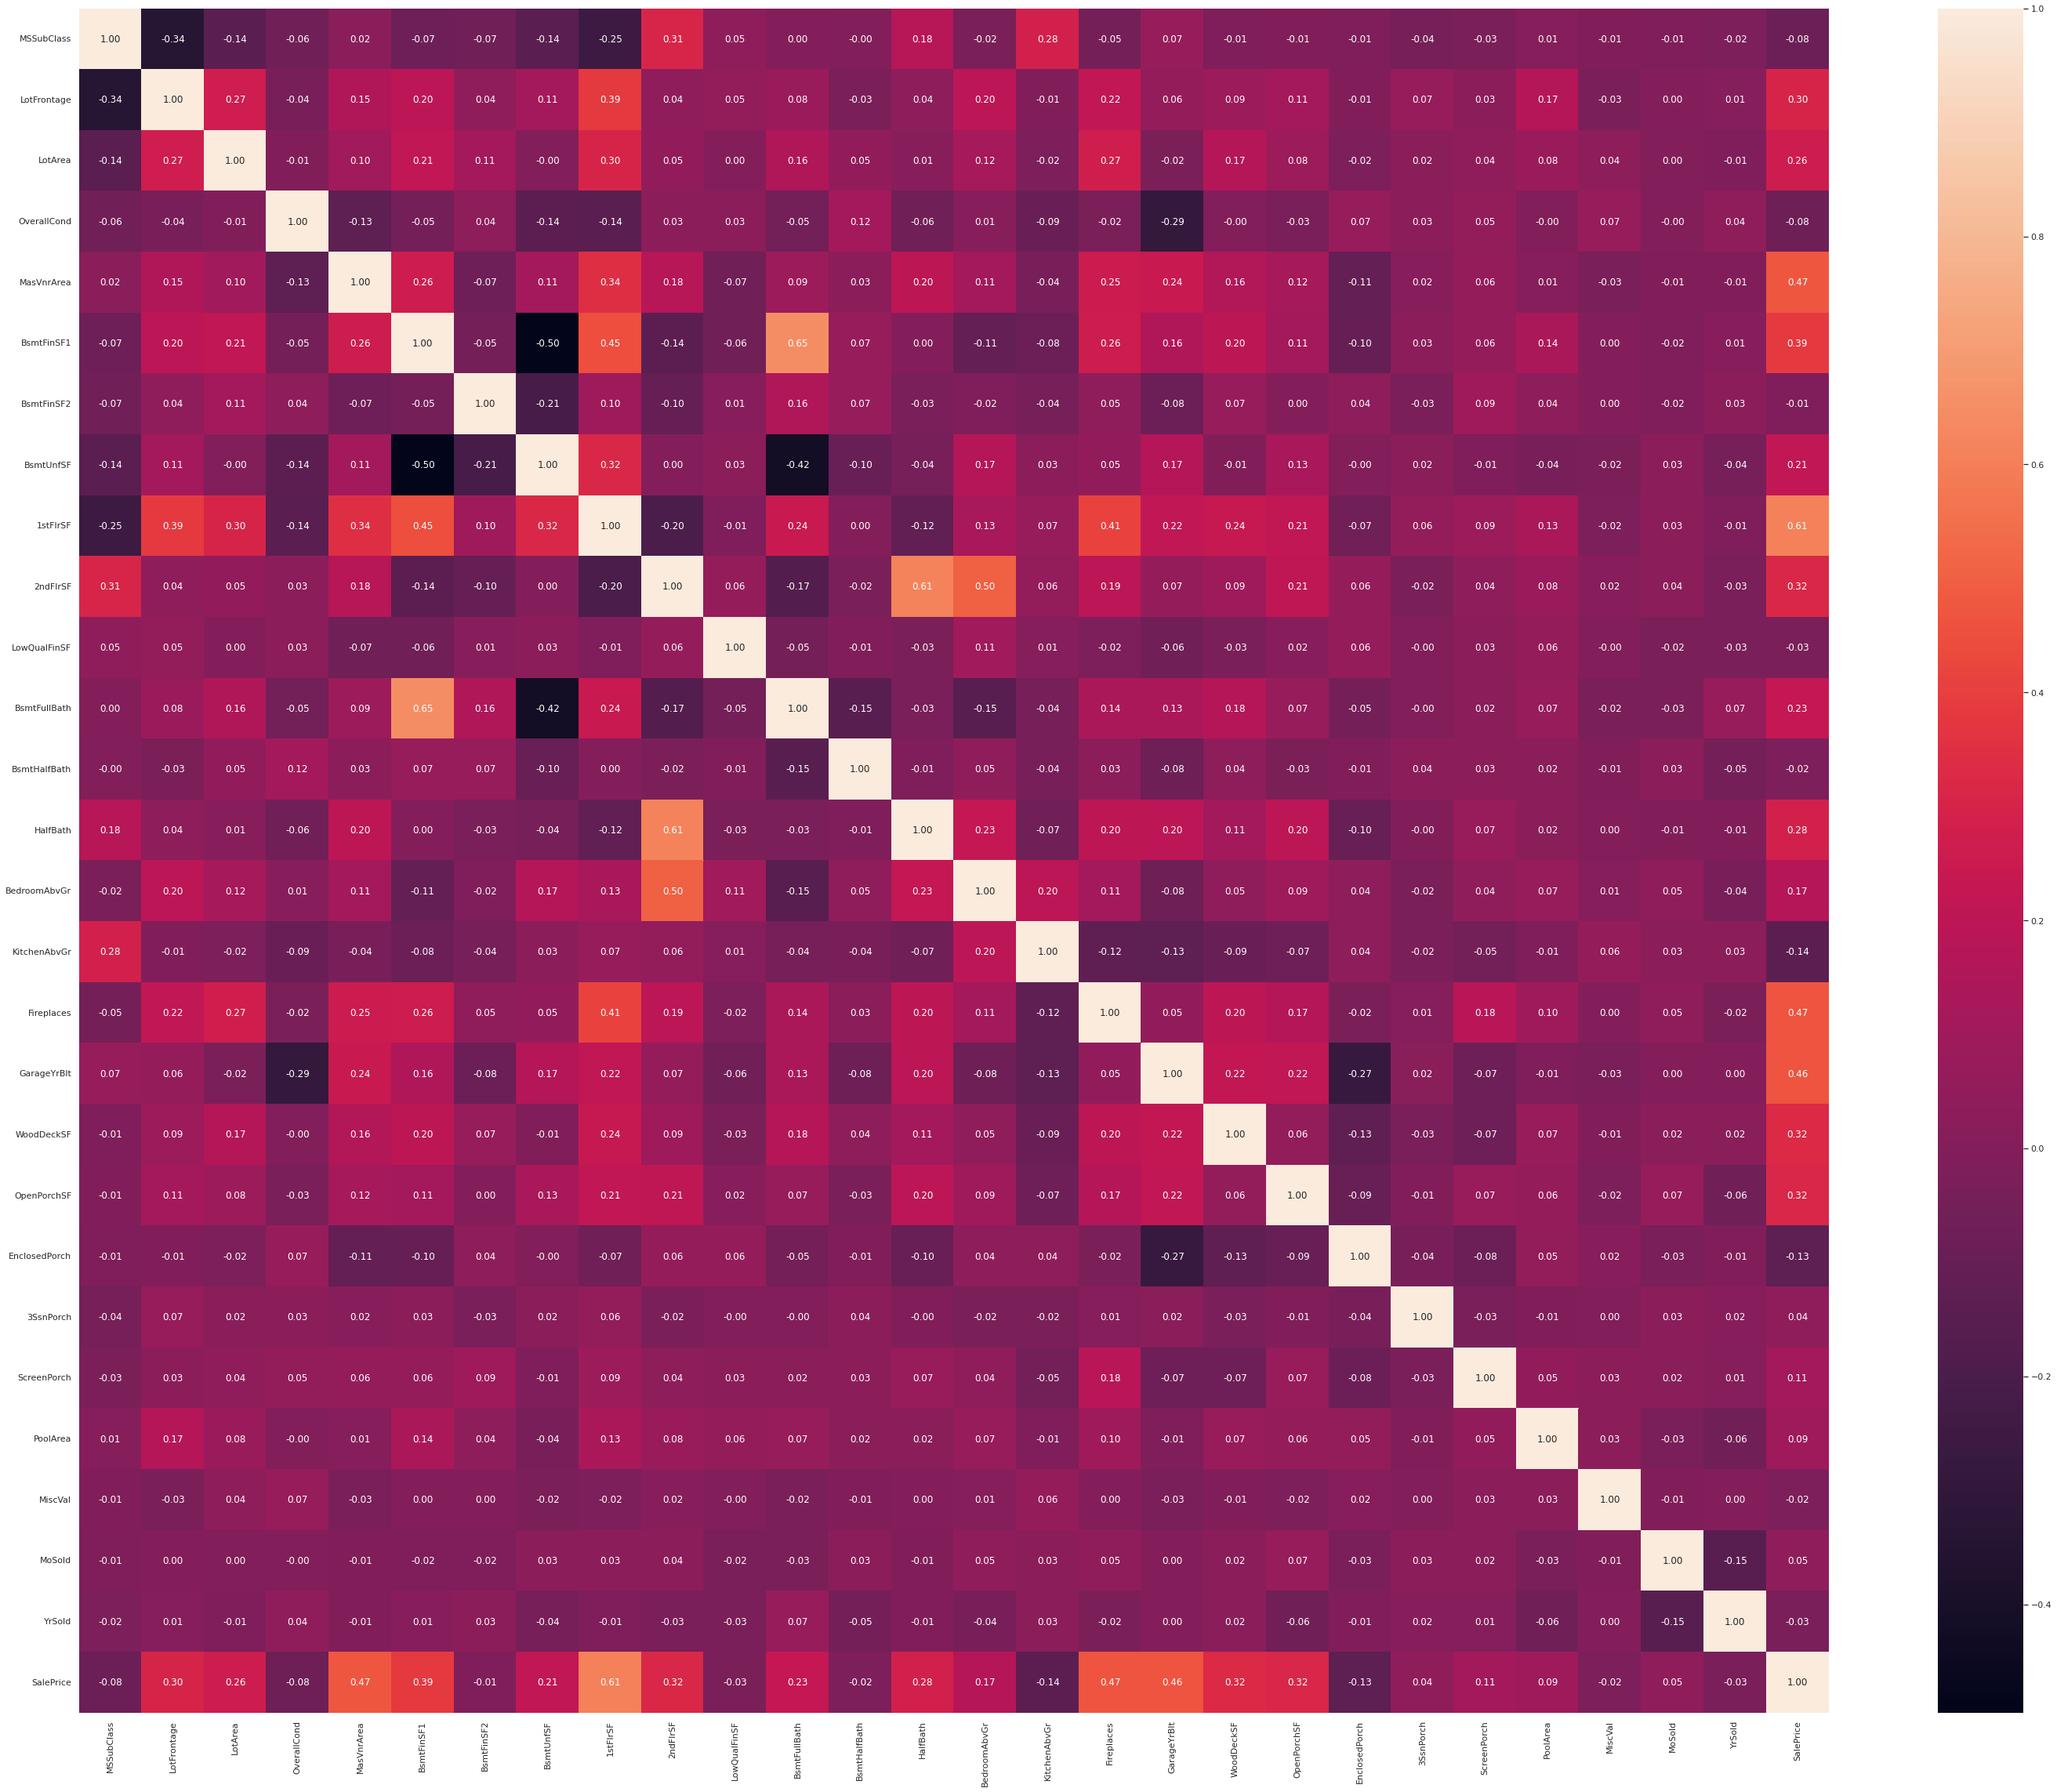

In [37]:
fig,axes = plt.subplots(1,1,figsize=(50,40))
sns.heatmap(data=dataTrain.corr(),annot=True,fmt='.2f',ax=axes)

### **Data Pre-processing**

Dropping the columns that have insignificant correlation with out target variable (unnecessary columns).

In [47]:
unnecessary = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','lstFIrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
lab = dataTrain['SalePrice']
idCol = dataTest['Id']
dataTrain = dataTrain.drop(columns=[str(item) for item in dataTrain.columns[1:] if str(item) in unnecessary],axis=1)
dataTest = dataTest.drop(columns=[str(item) for item in dataTest.columns[1:] if str(item) in unnecessary],axis=1)
dataTrain = dataTrain.drop(columns=['Id'],axis=1)
dataTest = dataTest.drop(columns=['Id'],axis=1)

In [36]:
dataTrain = dataTrain.fillna(method='bfill') #ffill=用前一個非Nan值替補，bfill=用後一個非Nan值替補
dataTest = dataTest.fillna(method='bfill')

### **Checking if further Nan values persist**

In [50]:
sum(dataTrain.isnull().sum()),sum(dataTest.isnull().sum())

(0, 0)

### **Splitting data into x(values) and y(labels)**

In [51]:
yTrain = lab
xTest = dataTest.to_numpy()
xTrain = dataTrain.to_numpy()

xTrain.shape , yTrain.shape , xTest.shape

((1460, 66), (1460,), (1460, 66))